In [1]:
import pandas as pd
import os
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go  

import sklearn

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn import metrics


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.metrics import confusion_matrix
import sklearn.decomposition as skdc
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import classification_report

In [3]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()

In [4]:
from sklearn.preprocessing import minmax_scale
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

In [5]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [6]:
def CalcOutliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [7]:
def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
     original_columns = list(dataframe.columns)
     dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=True)
     new_columns = [c for c in dataframe.columns if c not in original_columns]
     return dataframe, new_columns

In [8]:
os.chdir('/Users/mugefirsat/Downloads')

In [9]:
df = pd.read_csv('/Users/mugefirsat/Downloads/german (1).csv', delim_whitespace = True,header = None)

h = ['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings','employment_duration', 'installment_rate', 'personal_status_sex','other_debtors', 'present_residence', 'property', 'age','other_installment_plans', 'housing', 'number_credits', 'job','people_liable', 'telephone', 'foreign_worker', 'credit_risk']
df.columns=h

df.head()

#merge data set if needed 
#df_train = df_trans.merge(df_id, how='left', on='TransactionID')

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [10]:
# Suppression des doublons
df = df.drop_duplicates(keep = 'first')

doublons = df.duplicated().sum()
print("Il y a", doublons, "doublons dans transactions.")

Il y a 0 doublons dans transactions.


In [11]:
resumetable(df)

Dataset Shape: (1000, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,status,object,0,4,A11,A12,A14,1.80
1,duration,int64,0,33,6,48,12,3.76
2,credit_history,object,0,5,A34,A32,A34,1.71
3,purpose,object,0,10,A43,A43,A46,2.67
4,amount,int64,0,921,1169,5951,2096,9.80
5,savings,object,0,5,A65,A61,A61,1.69
6,employment_duration,object,0,5,A75,A73,A74,2.16
7,installment_rate,int64,0,4,4,2,2,1.81
8,personal_status_sex,object,0,4,A93,A92,A93,1.53
9,other_debtors,object,0,3,A101,A101,A101,0.54


In [12]:
#Type et NaNs

# On remplace les NANs de chaque colonne numérique par la moyenne sur cette colonne
#df.fillna(df.mean()) # df.mean() peut être remplacée par n'importe quelle méthode statistique.

df[['status','present_residence','installment_rate','credit_risk']]=df[['status','present_residence','installment_rate','credit_risk']].astype('object')
df[['duration','amount','installment_rate','age','number_credits','people_liable']]=df[['duration','amount','installment_rate','age','number_credits','people_liable']].astype('float')


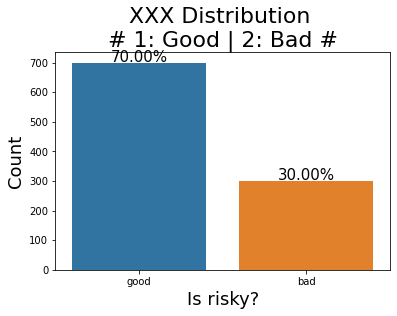

In [13]:
df['credit_risk']=np.where(df['credit_risk'] == 2, 'bad', df['credit_risk'])
df['credit_risk']=np.where(df['credit_risk'] != 'bad', 'good', df['credit_risk'])

total = len(df)

g = sns.countplot(x='credit_risk', data=df, )
g.set_title("XXX Distribution \n# 1: Good | 2: Bad #", fontsize=22)
g.set_xlabel("Is risky?", fontsize=18)
g.set_ylabel('Count', fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 
    
#(1 = Good, 2 = Bad)

In [14]:
print(pd.concat([df[df['credit_risk'] == 'good']['amount']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index(), 
                 df[df['credit_risk'] == 'bad']['amount']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index()],
                axis=1, keys=['Good', "Bad"]))

   Good             Bad          
  index    amount index    amount
0  0.01    384.83  0.01    607.39
1  0.10    935.60  0.10    929.70
2  0.25   1375.50  0.25   1352.50
3  0.50   2244.00  0.50   2574.50
4  0.75   3634.75  0.75   5141.50
5  0.90   6318.70  0.90   8983.60
6  0.99  11764.09  0.99  14903.76


In [15]:
CalcOutliers(df['amount'])
#We have 25 rows with outliers that represents 2.5641% of total rows.
#It's considering outlier values that are highest than 3 times the std from the mean

Identified lowest outliers: 0
Identified upper outliers: 25
Total outlier observations: 25
Non-outlier observations: 975
Total percentual of Outliers:  2.5641


In [16]:
print(df.describe())

          duration        amount  installment_rate          age  \
count  1000.000000   1000.000000       1000.000000  1000.000000   
mean     20.903000   3271.258000          2.973000    35.546000   
std      12.058814   2822.736876          1.118715    11.375469   
min       4.000000    250.000000          1.000000    19.000000   
25%      12.000000   1365.500000          2.000000    27.000000   
50%      18.000000   2319.500000          3.000000    33.000000   
75%      24.000000   3972.250000          4.000000    42.000000   
max      72.000000  18424.000000          4.000000    75.000000   

       number_credits  people_liable  
count     1000.000000    1000.000000  
mean         1.407000       1.155000  
std          0.577654       0.362086  
min          1.000000       1.000000  
25%          1.000000       1.000000  
50%          1.000000       1.000000  
75%          2.000000       1.000000  
max          4.000000       2.000000  


In [17]:
#Normalization

#df_train['TransactionAmt'] = np.log(df_train['TransactionAmt'])
#df_test['TransactionAmt'] = np.log(df_test['TransactionAmt'])

df['amount'] = np.log(df['amount'])

In [18]:

cols_need_scale = ['duration','amount','installment_rate','age','number_credits','people_liable']


def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


for col in cols_need_scale:
    df[col] = robust_scaler(df[col])


In [19]:
df[['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors',
       'property', 'other_installment_plans', 'telephone', 'foreign_worker','present_residence']].describe(include='all')

,status,credit_history,purpose,savings,employment_duration,personal_status_sex,other_debtors,property,other_installment_plans,telephone,foreign_worker,present_residence
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,2,2,4
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A191,A201,4
freq,394,530,280,603,339,548,907,332,814,596,963,413


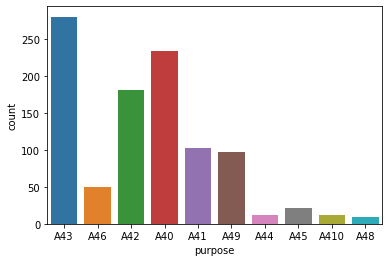

In [20]:
sns.countplot(df['purpose'])

#df_credit['purpose']=np.where(df_credit['purpose'] == 'A48', 'retraining/education', df_credit['purpose'])
#df_credit['purpose']=np.where(df_credit['purpose'] == 'A46', 'retraining/education', df_credit['purpose'])

In [21]:
cat_cols = [col for col in df.columns if df[col].dtypes != 'float']


def one_hot_encoder(dataframe, categorical_cols, nan_as_category=True):
     original_columns = list(dataframe.columns)
     dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=True)
     new_columns = [c for c in dataframe.columns if c not in original_columns]
     return dataframe, new_columns


df, new_cols_ohe = one_hot_encoder(df, cat_cols)

In [22]:
#Getting PCA

def PCA_change(df, cols, n_components, prefix='PCA_', rand_seed=4):
    pca = PCA(n_components=n_components, random_state=rand_seed)

    principalComponents = pca.fit_transform(df[cols])

    principalDf = pd.DataFrame(principalComponents)

    df.drop(cols, axis=1, inplace=True)

    principalDf.rename(columns=lambda x: str(prefix)+str(x), inplace=True)

    df = pd.concat([df, principalDf], axis=1)
    
    return df

df1 = df.copy(deep=True)
#mas_v = df_train.columns[55:394]
mas_v = ['duration','amount','installment_rate','age','number_credits','people_liable']

for col in mas_v:
    df1[col] = df1[col].fillna((df1[col].min() - 2))
    df1[col] = (minmax_scale(df1[col], feature_range=(0,1)))

    
df1 = PCA_change(df1, mas_v, prefix='PCA_V_', n_components=6)

In [23]:
df1.head()

,status_A12,status_A13,status_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_A62,savings_A63,savings_A64,savings_A65,employment_duration_A72,employment_duration_A73,employment_duration_A74,employment_duration_A75,personal_status_sex_A92,personal_status_sex_A93,personal_status_sex_A94,other_debtors_A102,other_debtors_A103,present_residence_2,present_residence_3,present_residence_4,property_A122,property_A123,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202,credit_risk_good,PCA_V_0,PCA_V_1,PCA_V_2,PCA_V_3,PCA_V_4,PCA_V_5
0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,-0.382535,0.136837,-0.224406,0.577687,-0.145480,-0.045701
1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0.218676,-0.354125,0.387738,-0.249115,0.016678,0.151650
2,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0.697172,0.579574,-0.154692,0.026269,-0.258844,-0.006074
3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0.738560,0.541229,0.373946,-0.045231,-0.229660,0.071986
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0.451400,0.764010,0.155643,0.250635,-0.028939,-0.060825


In [24]:
#Creating the X and y variables
X = df1.drop('credit_risk_good',axis=1)
y = df1['credit_risk_good']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)
#y_train.value_counts()

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=19)
rf.fit(X_train, y_train)

ys_pred_rf1 = rf.predict(X_test)

In [26]:
from sklearn import metrics

#Model Accuracy, how often is the classifier correct ?
print("Accuracy:",metrics.accuracy_score(y_test, ys_pred_rf1))

Accuracy: 0.7066666666666667


In [27]:
#Neural Network

from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1)

y_pred_keras = model.predict_classes(X_test)
# evaluate the keras model
#Model Accuracy, how often is the classifier correct ?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_keras))

#AUC
y_pred_keras = model.predict_classes(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
#ROC
auc_keras = auc(fpr_keras, tpr_keras)

print(sklearn.metrics.classification_report(y_test, y_pred_keras))

Epoch 1/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6971
Epoch 2/50
7/7 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.7000
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7000
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7000
Epoch 5/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7000
Epoch 6/50
7/7 [==============================] - 0s 5ms/step - loss: 0.5811 - accuracy: 0.7000
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.7000
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5655 - accuracy: 0.7000
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7014
Epoch 10/50
7/7 [==============================] - 0s 1ms/step - loss: 0.5491 - accuracy: 0.7043
Epoch 11/50
7/7 [======================

In [28]:
#logit_model=sm.Logit(y, X_pca)
#result=logit_model.fit()
#print(result.summary2())

logreg = LogisticRegression()
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
logreg.fit(X_train, y_train)
     
y_pred_log2 = logreg.predict(X_test)

#Model Accuracy, how often is the classifier correct ?
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print(classification_report(y_test, y_pred_log2))

Accuracy of logistic regression classifier on test set: 0.72
              precision    recall  f1-score   support

           0       0.54      0.49      0.51        90
           1       0.79      0.82      0.81       210

    accuracy                           0.72       300
   macro avg       0.67      0.66      0.66       300
weighted avg       0.72      0.72      0.72       300



In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
#smoote logit

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

oversample = SMOTE()
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Number transactions X_train dataset:  (700, 50)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 50)
Number transactions y_test dataset:  (300,)
Before OverSampling, counts of label '1': 490
Before OverSampling, counts of label '0': 210 

After OverSampling, the shape of train_X: (980, 50)
After OverSampling, the shape of train_y: (980,) 

After OverSampling, counts of label '1': 490
After OverSampling, counts of label '0': 490


In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

y_pred_logit_s = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logit_s))
fpr_logit_s, tpr_logit_s, thresholds_logit_s = roc_curve(y_test, y_pred_logit_s)
auc_logit_s = auc(fpr_logit_s, tpr_logit_s)
print(sklearn.metrics.classification_report(y_test, y_pred_logit_s))

Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.55      0.63      0.59        90
           1       0.83      0.78      0.80       210

    accuracy                           0.73       300
   macro avg       0.69      0.70      0.70       300
weighted avg       0.75      0.73      0.74       300



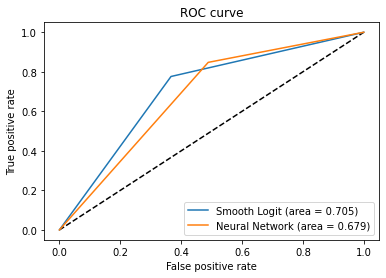

In [32]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_log2, tpr_log2, label='Logit (area = {:.3f})'.format(auc_log2))
plt.plot(fpr_logit_s, tpr_logit_s,label='Smooth Logit (area = {:.3f})'.format(auc_logit_s))
#plt.plot(fpr_pca, tpr_pca,label='PCA Logit (area = {:.3f})'.format(auc_pca))
#plt.plot(fpr_rf1, tpr_rf1, label='Random Forest (area = {:.3f})'.format(auc_rf1))
#plt.plot(fpr_bag, tpr_bag, label='Bagigin RF (area = {:.3f})'.format(auc_bag))
plt.plot(fpr_keras, tpr_keras, label='Neural Network (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()